# Extraction and exploration of Cognite OID

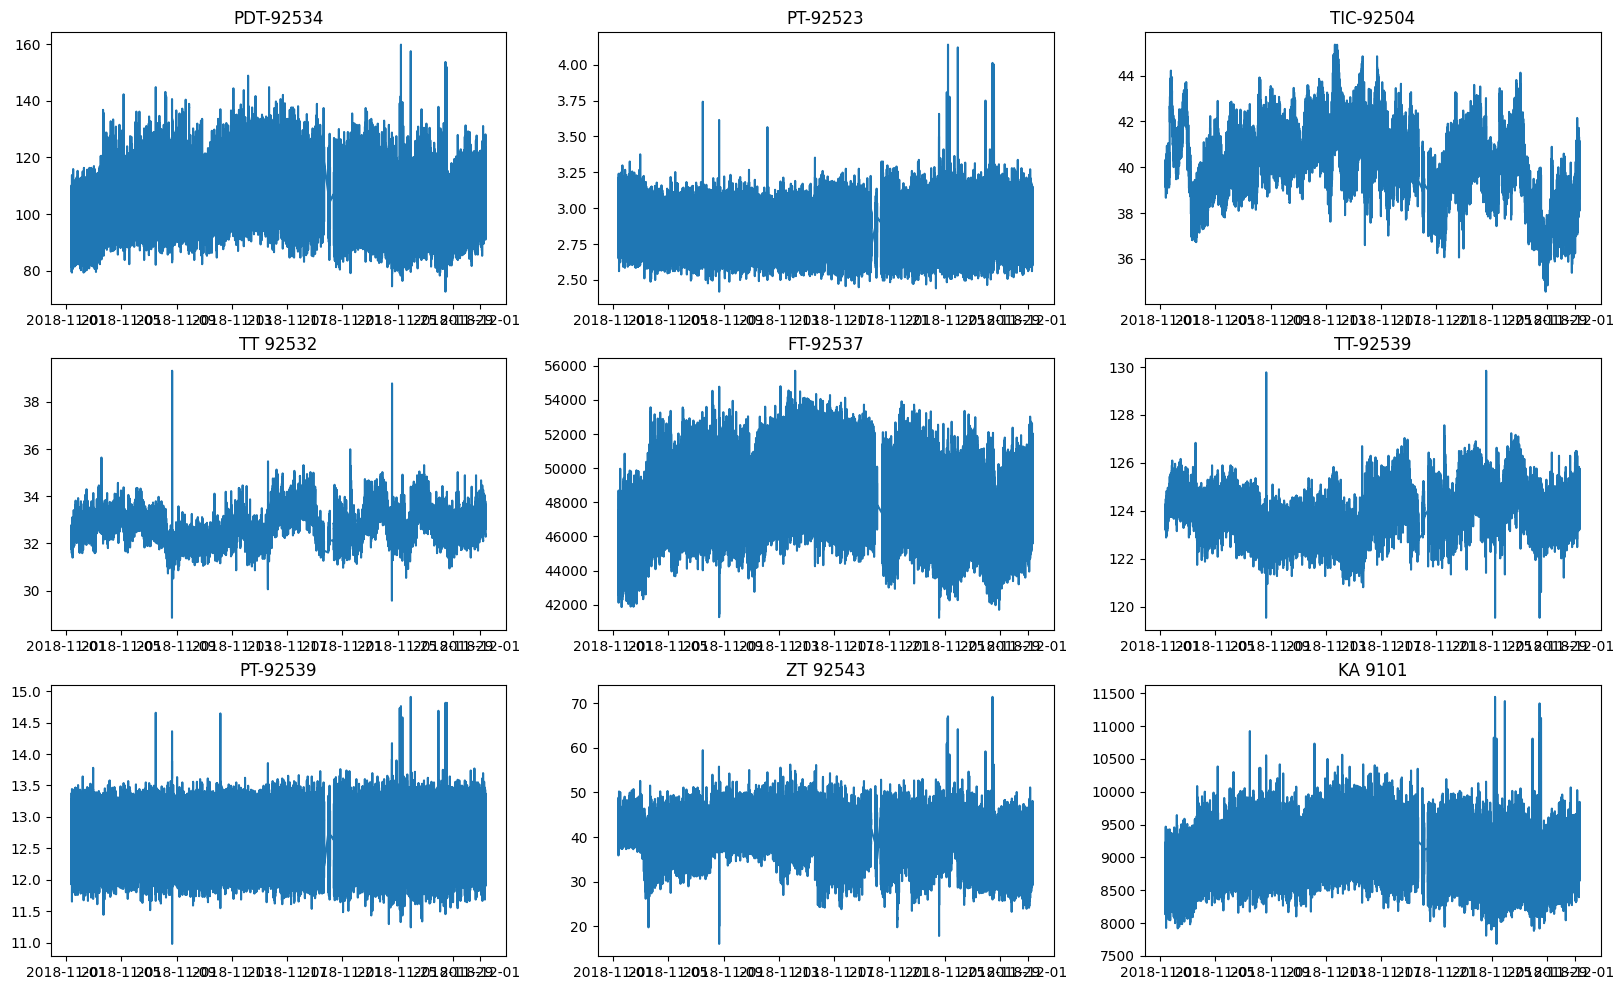

In [1]:
from publicdata import client as c
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import pandas as pd

# Nine sensors related to the inputs, outputs and controls of a compressor subsystem.
# Dictionary made with key=name of sensor and value=Id of sensor
sensors = {
    'PDT-92534': 6908033636680653,
    'PT-92523':8877482139815959,
    'TIC-92504':7012228881452176,
    'TT 92532':8152209984966682,
    'FT-92537':3278479880462408,
    'TT-92539':643849686863640,
    'PT-92539':1890487216163163,
    'ZT 92543':4146236330407219,
    'KA 9101':844472910348820
}
# I'll extract a pandas dataframe for each of the sensors in sensor_names, and these will be stored
# in the following dictionary, again with the sensor name as the key.
dfs_dict = {}

startdate = datetime(2018, 11, 1)
enddate = datetime(2018, 12, 1)
today = datetime.today()
days_since_start = (today - startdate).days
days_since_end = (today - enddate).days
starttime = f'{days_since_start}d-ago' # Start time of the interval I want to extract
endtime = f'{days_since_end}d-ago' # End time of the interval I want to extract

# Extract dataframes from Cognite OID and store them in the dfs_dict dictionary
for k, v in sensors.items():
    res = c.time_series.data.retrieve_dataframe(id=v, start=starttime, end=endtime, column_names='id')
    # Need to find a way to grab the unit of the time-series
    dfs_dict[k] = res

def plot_sensor_data(name):
    plt.plot(dfs_dict[name], label=name)
    plt.legend()
    plt.show()

def plot_all_nine_sensors(dataframe = dfs_dict):
    plt.figure(figsize=(20, 12))
    rows = 3
    cols = 3
    n = rows * cols
    index = 1
    for name, df in dataframe.items():
        plt.subplot(rows, cols, index)
        index += 1
        plt.plot(df)
        plt.title(name)

# plot_sensor_data('PT-92523')
plot_all_nine_sensors()


In [24]:
print(dfs_dict["ZT 92543"])

                         4146236330407219
2018-11-01 09:10:31.708         42.564102
2018-11-01 09:10:36.708         42.832722
2018-11-01 09:11:56.708         42.710621
2018-11-01 09:12:01.692         42.197803
2018-11-01 09:12:06.708         41.978024
...                                   ...
2018-12-01 09:10:07.020         41.953602
2018-12-01 09:10:12.005         43.101341
2018-12-01 09:10:17.005         44.566544
2018-12-01 09:10:22.020         45.958485
2018-12-01 09:10:27.005         46.642246

[368293 rows x 1 columns]


PDT-92534: Avg: 105.93050705924313 Std: 6.688616260640938 Shape: (2160372, 1)
New Shape:  (2160372, 1)
PT-92523: Avg: 2.8782022998429517 Std: 0.10389412154045356 Shape: (1832169, 1)
New Shape:  (910065, 1)
TIC-92504: Avg: 40.08378318614465 Std: 1.533145228265981 Shape: (1818179, 1)
New Shape:  (1818179, 1)
TT 92532: Avg: 32.83701701703755 Std: 0.7235586908022711 Shape: (213879, 1)
New Shape:  (213604, 1)
FT-92537: Avg: 47979.53667140208 Std: 1556.8297063882014 Shape: (2476234, 1)
New Shape:  (2476234, 1)
TT-92539: Avg: 124.07790495730013 Std: 0.9088793650198568 Shape: (376960, 1)
New Shape:  (376898, 1)
PT-92539: Avg: 12.68009877711243 Std: 0.2948645026722505 Shape: (1749336, 1)
New Shape:  (1625727, 1)
ZT 92543: Avg: 38.86595688766612 Std: 3.824614722261493 Shape: (368293, 1)
New Shape:  (368293, 1)
KA 9101: Avg: 9096.500374356578 Std: 252.2967162976244 Shape: (480585, 1)
New Shape:  (480585, 1)


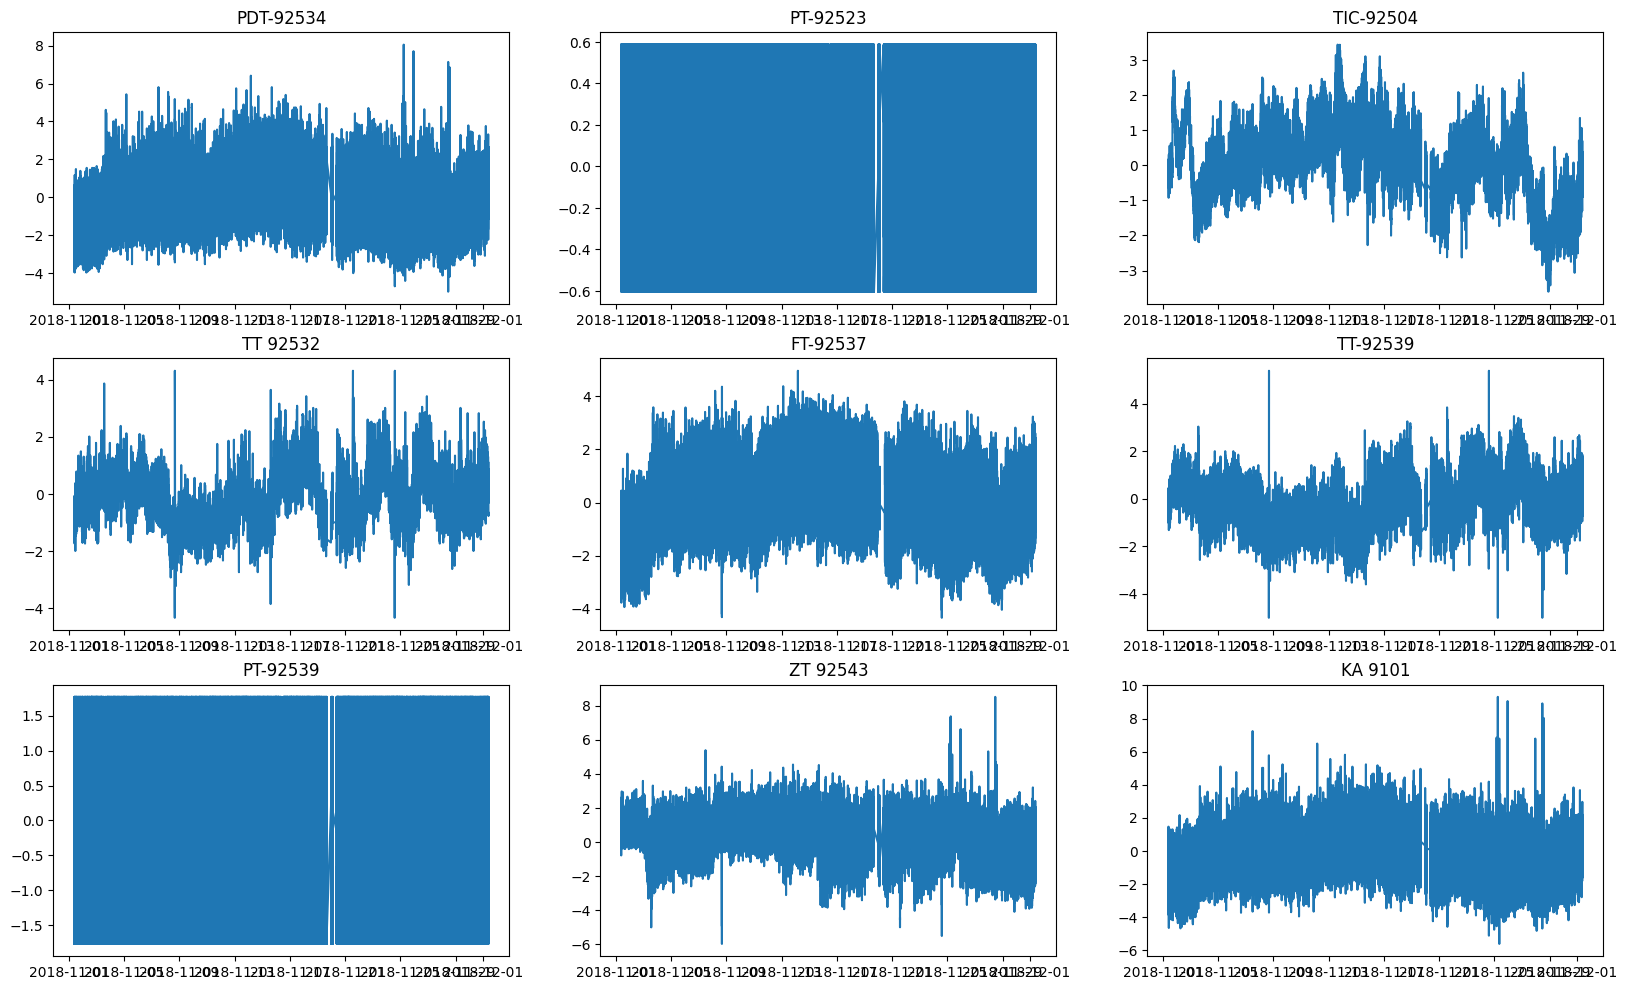

In [19]:
import numpy as np
norm_df = {}
k = 6 #width of the range of accepted values

for name, df in dfs_dict.items():
    avg = df.mean().iloc[0]
    std = df.std().iloc[0]
    tmp_df = (df-avg)/std
    upper = k*std
    lower = -k*std
    print(f'{name}: Avg: {avg} Std: {std} Shape: {tmp_df.shape}')


    # Create arrays of Boolean values indicating the outlier rows
    upper_array = tmp_df.index[tmp_df[tmp_df.columns[0]] >= upper].tolist()
    lower_array = tmp_df.index[tmp_df[tmp_df.columns[0]] <= lower].tolist()
    
    # Removing the outliers
    tmp_df.drop(index=upper_array, inplace=True)
    tmp_df.drop(index=lower_array, inplace=True)
    
    # Print the new shape of the DataFrame
    print("New Shape: ", tmp_df.shape)
    norm_df[name] = tmp_df

plot_all_nine_sensors(dataframe=norm_df)

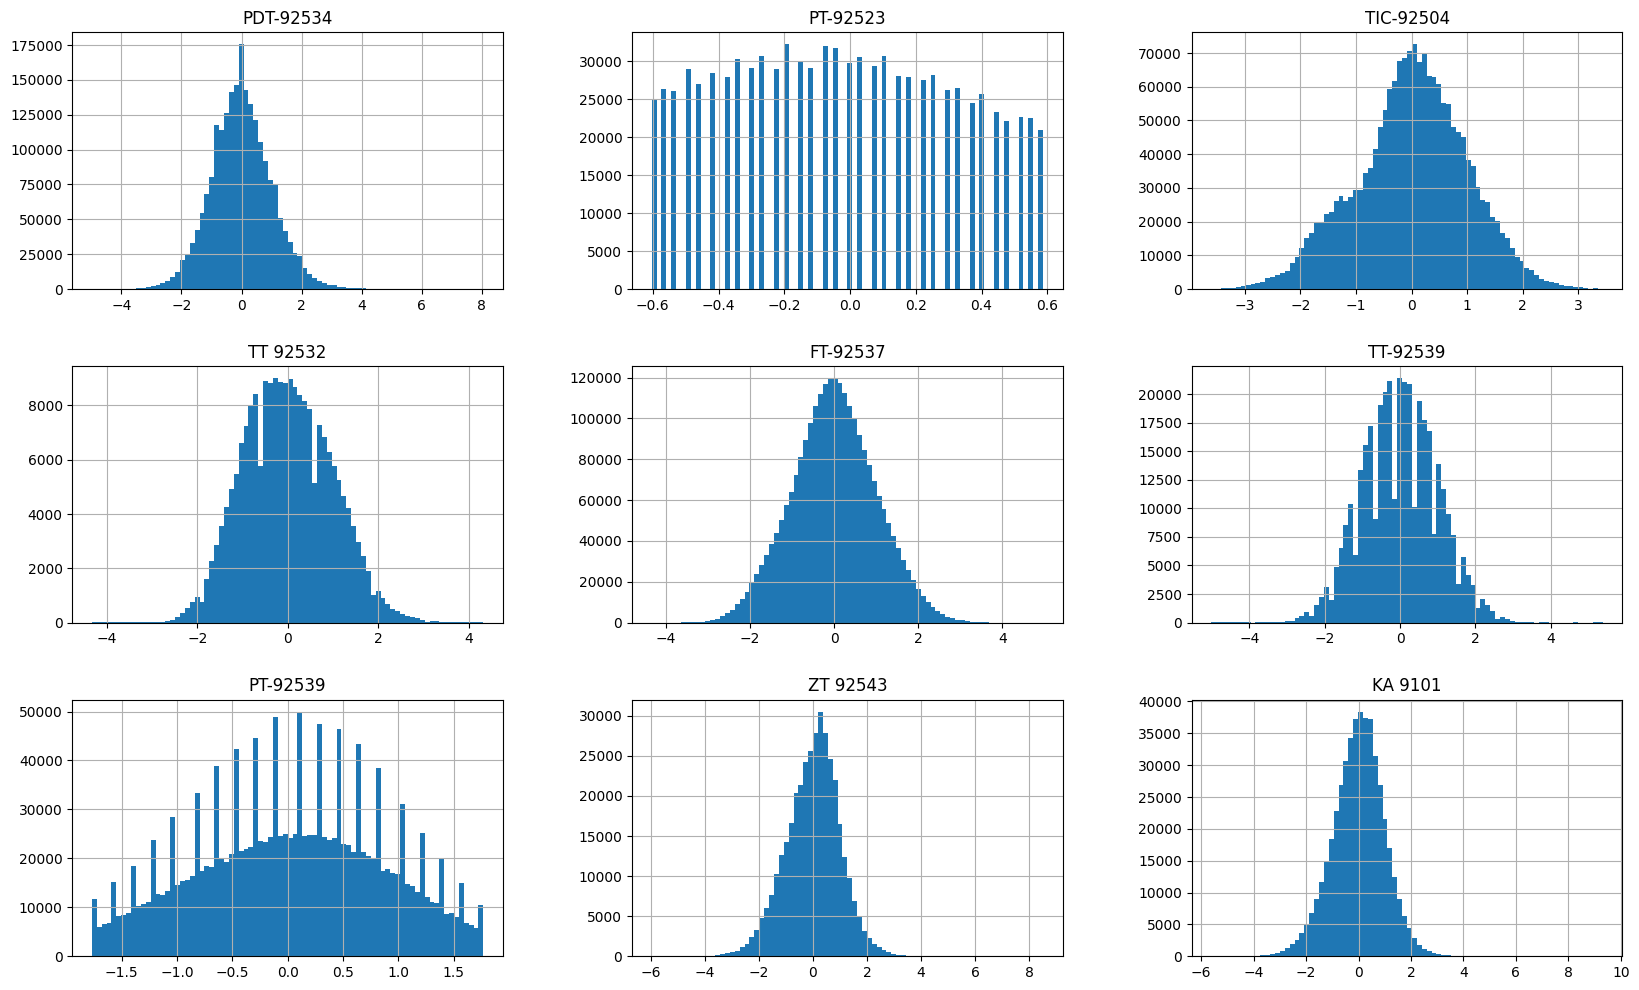

In [22]:
#Plot histograms
names = list(norm_df.keys())
fig, ax = plt.subplots(3, 3, figsize=(20, 12))
bins = 80

m=0
for i in range(3):
    for j in range(3):

        norm_df[names[m]].hist(bins = bins, ax=ax[i,j], figsize=(20, 18))
        ax[i,j].set_title(names[m])
        m+=1



[[0.0, inf, 0.783469944642496, 0.654668770231656, inf, 0.6315004619877991, 0.9492750746051616, inf, inf], [4.052148260484887, 0.0, 1.9730315718042881, 2.730318908055805, 3.385003438356902, 3.2176519998190596, 0.9893409851790733, inf, 4.343920169362686], [1.3967152805174172, inf, 0.0, 0.11833558627362678, inf, 0.31339384108305196, 0.30347615885808354, inf, inf], [1.0514848023352596, inf, 0.08691291604839216, 0.0, inf, 0.09339167095755233, 0.4924797847463058, inf, inf], [0.6063314212659018, inf, 0.14212938425660637, 0.06599276543264201, 0.0, 0.07468841110955832, 0.54124158187061, inf, inf], [0.8159975348646644, inf, 0.2042170362438422, 0.07430017421317422, inf, 0.0, 0.7004492497467862, inf, inf], [2.3878440225399107, inf, 0.4996216761204132, 1.063544911590652, inf, 1.5795071019370057, 0.0, inf, inf], [0.11381534363646735, inf, 0.6931476853949217, 0.46878693676859695, 0.28280153583077483, 0.40055603620059155, 1.0059620700713492, 0.0, 0.1651584552461266], [0.02455545023461893, inf, 0.94756

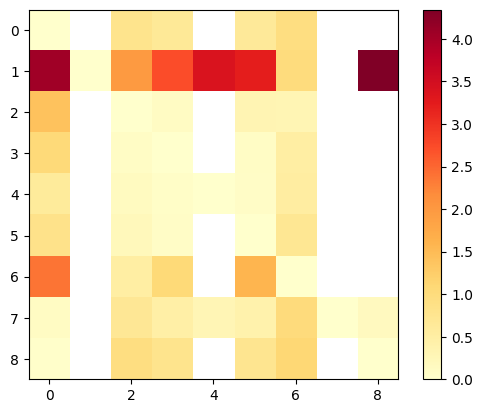

In [21]:
%pip install scipy
from scipy.stats import entropy
import numpy as np
KL = []

i = 0
j = 0

for name, df in norm_df.items():
    row = []
    hist1 = np.histogram(df, bins=bins)[0]
    hist1 = hist1/sum(hist1)
    for name2, df2 in norm_df.items():
        hist2 = np.histogram(df2, bins=bins)[0]
        hist2 = hist2/sum(hist2)
        row.append(entropy(hist1, hist2))
    KL.append(row)

print(KL)
im = plt.imshow(KL, cmap="YlOrRd")
plt.colorbar(im)
plt.show()

In [15]:
%pip install jinja2
all_dfs = pd.DataFrame()
for name, df in norm_df.items():
    all_dfs[name] = df

corr = all_dfs.corr()
corr.style.background_gradient(cmap='Spectral')


Note: you may need to restart the kernel to use updated packages.


,PDT-92534,PT-92523,TIC-92504,TT 92532,FT-92537,TT-92539,PT-92539,ZT 92543,KA 9101
PDT-92534,1.000000,0.144700,0.329464,-0.083013,0.819716,-0.282051,0.085898,0.362316,0.822847
PT-92523,0.144700,1.000000,0.010660,1.000000,nan,-0.126848,0.557968,0.665238,0.870043
TIC-92504,0.329464,0.010660,1.000000,-0.050396,0.305786,-0.259423,0.074255,0.355980,0.383443
TT 92532,-0.083013,1.000000,-0.050396,1.000000,nan,0.885089,-0.065099,-0.369802,-0.133316
FT-92537,0.819716,nan,0.305786,nan,1.000000,-0.257815,-0.204660,nan,nan
TT-92539,-0.282051,-0.126848,-0.259423,0.885089,-0.257815,1.000000,-0.101767,-0.391753,-0.319374
PT-92539,0.085898,0.557968,0.074255,-0.065099,-0.204660,-0.101767,1.000000,-0.436837,0.577502
ZT 92543,0.362316,0.665238,0.355980,-0.369802,nan,-0.391753,-0.436837,1.000000,0.016810
KA 9101,0.822847,0.870043,0.383443,-0.133316,nan,-0.319374,0.577502,0.016810,1.000000
